In [1]:
import os.path
from IPython.display import SVG

def fig(pathname):
    try:
        with open("IMAGEPATH","r") as ip:
            pfx = ip.readline()
            pathname = os.path.join(pfx.strip(),pathname)
    except:
        raise
    try:
        with open(pathname,"rb") as inf:
            svgdata = inf.read()
            display(SVG(svgdata))
    except:
        raise

# Example T01u: Net Areas of Plates with Staggered Holes

Determine the net areas to be used when finding the factored tension resistance of the following
plate lap joint.  The net areas may be different for the central (20 mm) and side (10 mm) plates, so determine both.

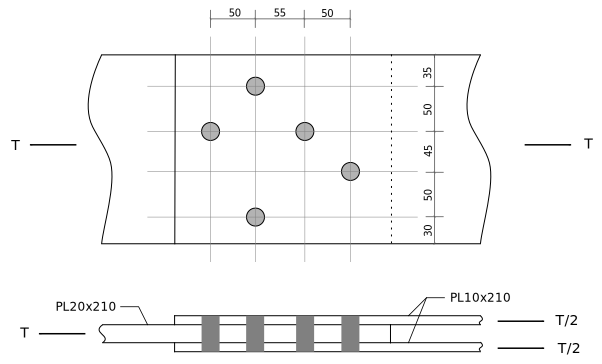

In [2]:
fig("lap-plates-1.svg")

**Lap Plate Connection**

Please note that this  type of hole pattern rarely occurs in practice -- 
practical patterns are more regular and 'grid-like'.  This example illustrates:
* how failure paths depend on the direction of the load relative to the hole group.
* the calculations necessary to determine a net cross-sectional area for each potential failure path.

The  figure shows an irregular bolt pattern in a lap tension splice.  To determine the
net areas of the plates, we must examine every possible failure path that has the
following attributes:

* it separates each plate into 2 complete parts.
* it is of minimum length for that path.
* there are no bolts or holes completely on the loaded side of the path; all of the bolt bearing areas are on the side opposite the load.

We then determine the area from the path with minimum width.

In this example, we will assume M20 bolts in punched holes, and thus the hole
allowance to be used is $d = 20~\mathrm{mm}+2~\mathrm{mm}+2~\mathrm{mm} = 24~\mathrm{mm}$.


#### Compute with units

In [3]:
import pint                   # setup to use the module for computing with units
ureg = pint.UnitRegistry()
mm = ureg['mm']
ureg.default_format = '~P'

# if you do not want to use units, simply uncomment the following line:
# mm = 1

## The 10mm Plates (outer plates)

The  shows the paths appropriate for investigating the strength of the outside (10mm) plates.
For this case, the loaded side of the connection is toward the right side, and so there are
no complete holes on that side of any path.

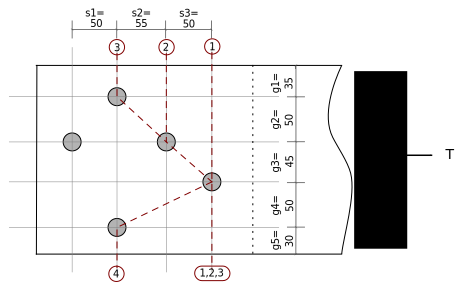

In [4]:
fig("paths-1i.svg")

**Failure Paths for Net Area Calculations, Outside (10mm) plates**

### Define the Data:

In [5]:
d = (20 + 2 + 2) * mm       # hole allowance: bolt dia. + 2mm clearance + 2mm for punching
s1 = 50 * mm
s2 = 55 * mm
s3 = 50 * mm
g1,g2,g3,g4,g5 = (35,50,45,50,30) * mm
t1 = 10 * mm                # thickness of one outside plate
t2 = 20 * mm                # thickness of inside plate
wg = g1+g2+g3+g4+g5
print('wg =',wg)                         # gross width of plate

wg = 210 mm


In the following, we will compute the net width, $w_{ne}$, for each failure path, then use the minimum so computed to determine the cross-sectional area.

### Path 1-1:
For path 1-1, it is only necessary to deduct the allowance for one hole from the gross width.
In general, if no path segments are inclined to the load:

$w_{ne} = w_g - \sum d$

In [6]:
wne_11 = wg - d
wne_11

186 mm

### Path 2-2:
For paths with segments inclined to the load, we subtract all hole allowances, $d$, then
add the $s^2/4g$ correction term for each inclined segment:

$w_{ne} = w_g - \sum d + \sum{s^2\over 4g}$

In [7]:
wne_22 = wg - 2*d + s3**2/(4*g3)
wne_22

175.88888888888889 mm

### Path 3-3:

$w_{ne} = w - \sum d + \sum{s^2\over 4g}$

In [8]:
wne_33 = wg - 3*d + s3**2/(4*g3) + s2**2/(4*g2)
wne_33

167.01388888888889 mm

### Paths 1-4, 2-4 and 3-4:

Adding the fourth bolt to each of the above paths will reduce the net width by $24~\mathrm{mm}$
for the hole, then
increase it by $(s2+s3)^2/(4 g4)$ for the inclined segment.  Paths that include this hole will not govern if the term for the inclined segment is less than 24.  However, given that these variable values might change, its probably safest to compute them all.

In [9]:
delta = (s2+s3)**2/(4*g4) - d    # the amount wn increases by including the hole on path 4
wne_14 = wne_11 + delta
wne_24 = wne_22 + delta
wne_34 = wne_33 + delta
delta, wne_14, wne_24, wne_34

(31.125 mm, 217.125 mm, 207.01388888888889 mm, 198.13888888888889 mm)

### Summary

The path with the smallest $w_n$ governs,
so $A_n$ for the pair of 10 mm plates is:

In [10]:
wne = min(wne_11,wne_22,wne_33,wne_14,wne_24,wne_34)
wne

167.01388888888889 mm

In [11]:
An_10 = wne * t1*2    # because there are 2 thicknesses of 10 mm plate
An_10

3340.277777777778 mm²

## 20mm Plate (Inner Plate)

The following figure  shows the possible failure paths for calculating the strength of the 20mm plate.
For this case, the loaded side is toward the left.

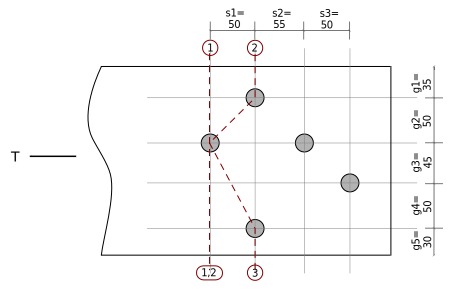

In [12]:
fig("paths-2i.svg")

**Failure Paths for Net Area Calculations, Inside (20mm) plate**

### Path 1-1:

In [13]:
wne_11 = wg - d
wne_11

186 mm

### Path 2-2:

In [14]:
wne_22 = wg - 2*d + s1**2/(4*g2)
wne_22

174.5 mm

### Path 2-3:

In [15]:
wne_23 = wg - 3*d + s1**2/(4*g2) + s1**2/(4*(g3+g4))
wne_23

157.07894736842104 mm

### Path 1-3:

By inspection this should not govern, as path 1-1 is longer than 2-2, therefore 1-3 will be longer than 2-3.

In [16]:
wne_13 = wg - 2*d + s1**2/(4*(g3+g4))
wne_13

168.57894736842104 mm

### Summary

The shortest path (minimum $w_n$) governs, and so the net area, $A_n$, of the 20 mm plate is:

In [17]:
wne = min(wne_11,wne_22,wne_23,wne_13)
wne

157.07894736842104 mm

In [18]:
An_20 = wne * t2
An_20

3141.578947368421 mm²

The net area fracture strength of the plates will therefore be governed by the net area of the inner 20mm plate.

In [19]:
An_10, An_20

(3340.277777777778 mm², 3141.578947368421 mm²)